In [1]:
import sys
sys.path.append("..")

In [2]:
from data_tools.tools import *
from scipy.integrate import odeint
import seaborn as sns
from matplotlib import pyplot as plt
from DE_Library.diferential_equation_functionals import *

from matplotlib import rc
rc('text', usetex=True)

In [3]:
results_QK = load_feather_folder_as_pd("../data/results/DE_1_35")

['../data/results/DE_1_35\\0.feather', '../data/results/DE_1_35\\1.feather', '../data/results/DE_1_35\\10.feather', '../data/results/DE_1_35\\100.feather', '../data/results/DE_1_35\\101.feather', '../data/results/DE_1_35\\102.feather', '../data/results/DE_1_35\\103.feather', '../data/results/DE_1_35\\104.feather', '../data/results/DE_1_35\\105.feather', '../data/results/DE_1_35\\106.feather', '../data/results/DE_1_35\\107.feather', '../data/results/DE_1_35\\108.feather', '../data/results/DE_1_35\\109.feather', '../data/results/DE_1_35\\11.feather', '../data/results/DE_1_35\\110.feather', '../data/results/DE_1_35\\111.feather', '../data/results/DE_1_35\\112.feather', '../data/results/DE_1_35\\113.feather', '../data/results/DE_1_35\\114.feather', '../data/results/DE_1_35\\115.feather', '../data/results/DE_1_35\\116.feather', '../data/results/DE_1_35\\117.feather', '../data/results/DE_1_35\\118.feather', '../data/results/DE_1_35\\119.feather', '../data/results/DE_1_35\\12.feather', '../da

c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' 

0.3989143371582031


c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' 

In [4]:
results_QK

,f_sol,optimal_alpha,mse,method,loss_name,domain,executor_type,encoding_circuit,num_qubits,num_layers,mse_history,loss_history,eta
0,"[1.000197073225142, 0.7666158313158564, 0.2906...","[-2.6388855183847024, -80.84286731852882, 136....",0.000002,PQK,paper,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,HEEAndChebyshevTower,2,1,"[74.55631309849653, 53.78877608652001, 30.7924...","[209.71699148978297, 176.3408001254935, 132.19...",0.01
1,"[1.0006836053170516, 0.7660530146417845, 0.288...","[-3.9333851033310103, -75.2153256749747, 136.0...",0.000001,PQK,paper,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,HEEAndChebyshevTower,2,1,"[76.40830418713819, 53.60587016690256, 23.9492...","[1035.2406155192712, 875.9193071966023, 784.90...",0.056234
2,"[1.000099443597315, 0.7673547560908222, 0.2872...","[0.06482101811854224, 1.0317156471998292, -0.0...",0.000002,PQK,paper,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,HEEAndChebyshevTower,4,1,"[17.267847408666455, 1.1899580939133236, 2.721...","[54.43815211475875, 32.56113560018146, 25.0343...",0.01
3,"[-0.5500005548487863, -0.2319415196167327, -0....","[23.494743902601428, -78.5213436542145, 175.05...",5741404420602756096.0,PQK,bernoulli_DE,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,HEEAndChebyshevTower,4,1,"[1.7224213238706042e+20, 1.7224213238841082e+2...","[96.67990072053028, 86.4352239187906, 74.55864...",0.01
4,"[-1.0996441818948988, -0.705400456046597, -0.5...","[26.781560486641666, -90.295833512949, 199.916...",5741404420905148416.0,PQK,bernoulli_DE,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,HEEAndChebyshevTower,4,1,"[1.7224213238706058e+20, 1.722421323880863e+20...","[513.5151347454168, 473.2400277656016, 439.941...",0.056234
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,"[-0.5345925839886263, -0.3052457169759819, -0....","[22.68075748628604, -153.71613784480203, 324.1...",5741404422374695936.0,PQK,bernoulli_DE,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,HEEAndChebyshevTower,3,1,"[1.7224213237709177e+20, 1.7224213238197263e+2...","[348.1660247574947, 329.5516097261691, 309.092...",0.01
116,"[-1.03998311579414, -0.7792677428471784, -0.57...","[31.482232803004845, -320.38436503372253, 867....",5741404422008102912.0,PQK,bernoulli_DE,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,HEEAndChebyshevTower,3,1,"[1.7224213237710127e+20, 1.722421323817071e+20...","[1883.4512795702208, 1799.5222542669383, 1755....",0.056234
117,"[-1.4324954283654172, -1.1449174370736621, -0....","[19.558295545868273, -228.5416324054479, 664.7...",5741404423738702848.0,PQK,bernoulli_DE,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,HEEAndChebyshevTower,3,1,"[1.722421323771028e+20, 1.7224213238166163e+20...","[10516.139277699634, 10062.713003527957, 9864....",0.316228
118,"[-1.6891187169971715, -1.3829224526147037, -1....","[12.344346016701676, -161.8136337492381, 476.3...",5741404425567500288.0,PQK,bernoulli_DE,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,HEEAndChebyshevTower,3,1,"[1.72242132377103e+20, 1.722421323816536e+20, ...","[59061.154291476785, 56529.48721791775, 55458....",1.778279


In [5]:
results_QK
#include an extra column called epochs, which generates and array from 0 to the number of epochs

results_QK["epochs"] = results_QK["loss_history"].apply(lambda x: np.arange(len(x)))
#create a new column called final_mse_loss, which is the last element of the loss_history column, and final_loss_history, which is the last element of the loss_history column

In [6]:
results_QK_exploded = results_QK.explode(["epochs", "loss_history", "mse_history"])

results_QK_exploded["epochs"] = results_QK_exploded["epochs"].astype(int)

#results_QK_exploded["loss_history"] change name to results_QK_exploded["$\mathcal{L}(f^\prime(x), f(x), x)$"]
loss_history_str = "$\mathcal{L}(f^\prime(x), f(x), x)$"
mse_history_str = r"$|f(x)-f_{\mathrm{exact}}(x)|^2$"


paper_str = "$\lambda e^{-\lambda k x} \sin(\lambda x) + \lambda k f(x) + df/dx$ = 0"
log_str = r"$\frac{df}{dx} - \lambda e^{kf(x)} = 0$"



results_QK_exploded["elegant_loss_name"] = results_QK_exploded["loss_name"].apply(lambda x: paper_str if x == "paper" else x)
results_QK_exploded["elegant_loss_name"] = results_QK_exploded["loss_name"].apply(lambda x: log_str if x == "log_ode" else x)

results_QK["elegant_loss_name"] = results_QK["loss_name"].apply(lambda x: paper_str if x == "paper" else x)
results_QK["elegant_loss_name"] = results_QK["loss_name"].apply(lambda x: log_str if x == "log_ode" else x)

results_QK["Final " + loss_history_str] = results_QK["loss_history"].apply(lambda x: x[-1])
results_QK["Final " + mse_history_str] = results_QK["mse_history"].apply(lambda x: x[-1])

results_QK_exploded[loss_history_str] = results_QK_exploded["loss_history"]
results_QK_exploded[mse_history_str] = results_QK_exploded["mse_history"]



In [7]:
#concatenate the two dataframes
results = pd.concat([results_QK_exploded])
results["Number of qubits"] = results["num_qubits"]
results["Iteration"] = results["epochs"]


C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_11060\966309747.py:9: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  g = sns.relplot(x="Iteration", y=loss_history_str,
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future vers

(0.0, 180.0)

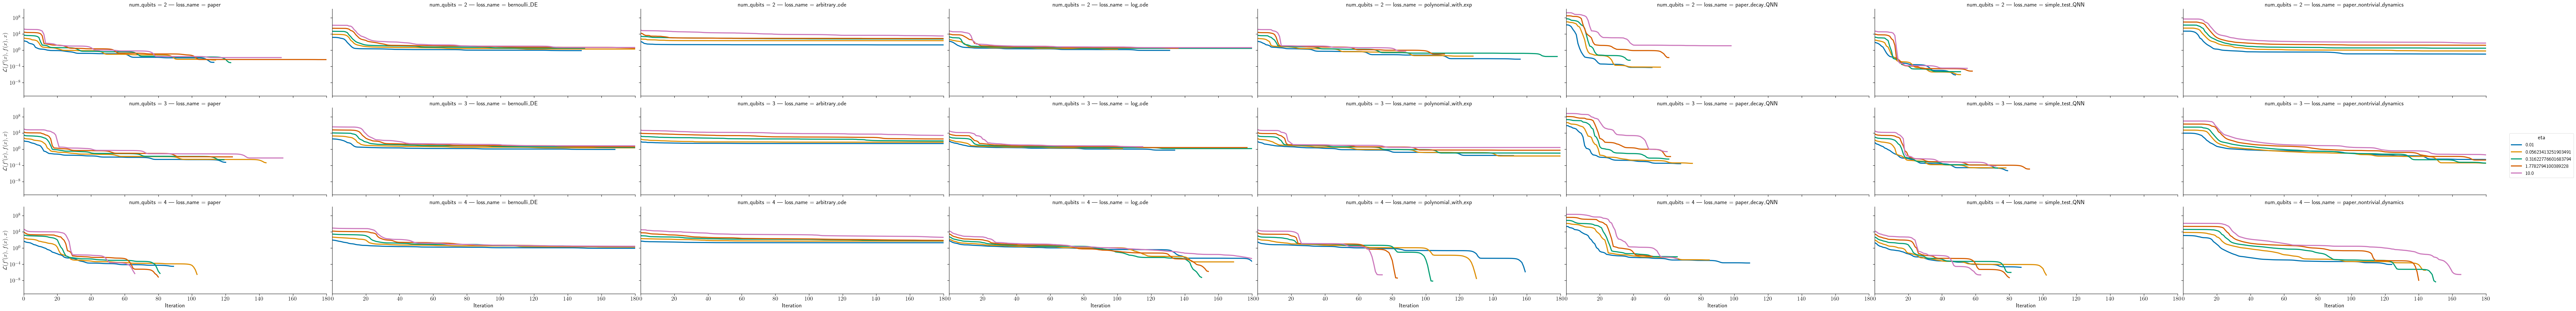

In [8]:
import seaborn as sns

sns.set_context("paper", rc={"font.size":10,"axes.titlesize":6,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":16,  'lines.linewidth': 3})


palette = sns.color_palette("colorblind", 10)
g = sns.relplot(x="Iteration", y=loss_history_str, 
                data=results,
                kind="line", 
                col="loss_name", 
                row="num_qubits",
                hue="eta",
                height=4,  # Adjust the height as needed
                aspect=3,  
                palette=palette,
                linewidth=3
                )

#include loss name in y axis

#g.set_titles(" {col_name}")
g.set(yscale="log") 

leg = g._legend
leg.set_frame_on(True)

plt.xlim(0, 180)


C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_11060\1957296431.py:9: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  g = sns.relplot(x="Iteration", y=mse_history_str,
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future vers

(0.0, 180.0)

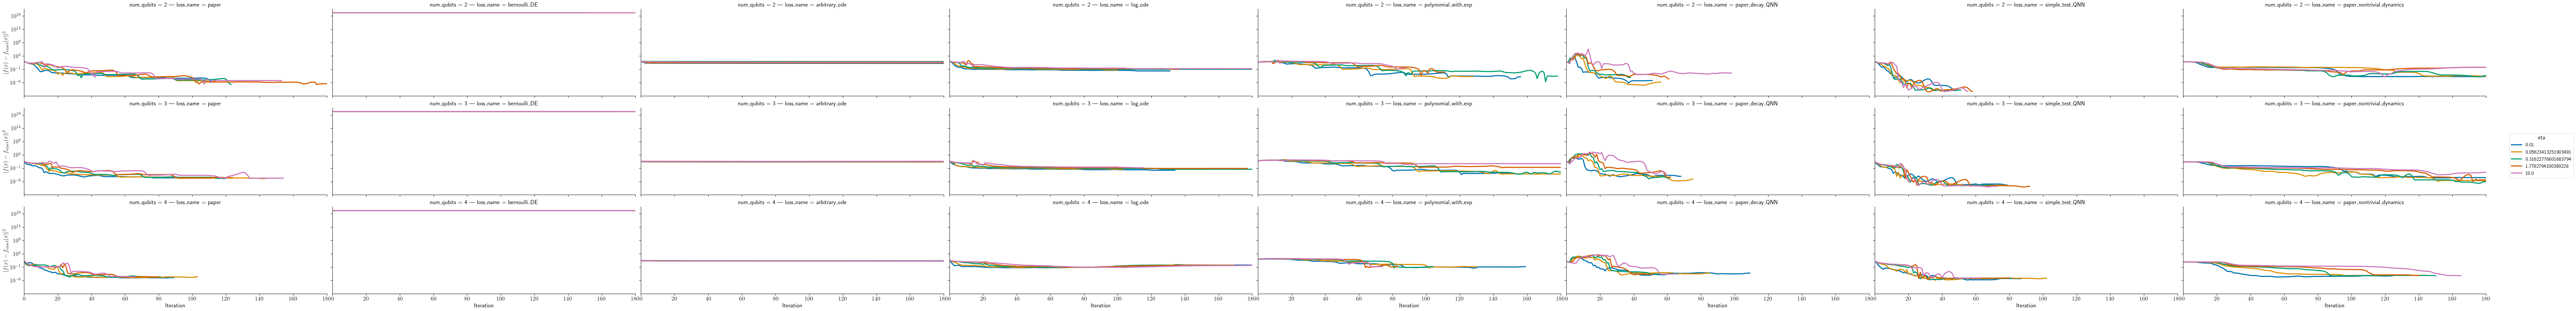

In [9]:
import seaborn as sns

sns.set_context("paper", rc={"font.size":10,"axes.titlesize":6,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":16,  'lines.linewidth': 3})


palette = sns.color_palette("colorblind", 10)
g = sns.relplot(x="Iteration", y=mse_history_str, 
                data=results,
                kind="line", 
                col="loss_name", 
                row="num_qubits",
                hue="eta",
                height=4,  # Adjust the height as needed
                aspect=3,  
                palette=palette,
                linewidth=3
                )

#include loss name in y axis

#g.set_titles(" {col_name}")
g.set(yscale="log") 

leg = g._legend
leg.set_frame_on(True)

plt.xlim(0, 180)


In [10]:
results["min " + mse_history_str] = results.groupby(["method", "loss_name", "num_qubits"])["mse_history"].transform("min")
results["min " + loss_history_str] = results.groupby(["method", "loss_name", "num_qubits"])["loss_history"].transform("min")

mse_df = results[["method", "loss_name", "Number of qubits", "min " + mse_history_str]].drop_duplicates().rename(columns={"min " + mse_history_str: "min_loss"})
mse_df["Type of Loss"] = mse_history_str

true_loss_df = results[["method", "loss_name", "Number of qubits", "min " + loss_history_str]].drop_duplicates().rename(columns={"min " + loss_history_str: "min_loss"})
true_loss_df["Type of Loss"] = loss_history_str

combined_df = pd.concat([mse_df, true_loss_df])
#rename min_loss to Loss
combined_df = combined_df.rename(columns={"min_loss": "Loss"})
combined_df = combined_df.rename(columns={"method": "Method"})


C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_11060\338040746.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  g = sns.relplot(x="eta", y="Final " + loss_history_str ,
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a futur

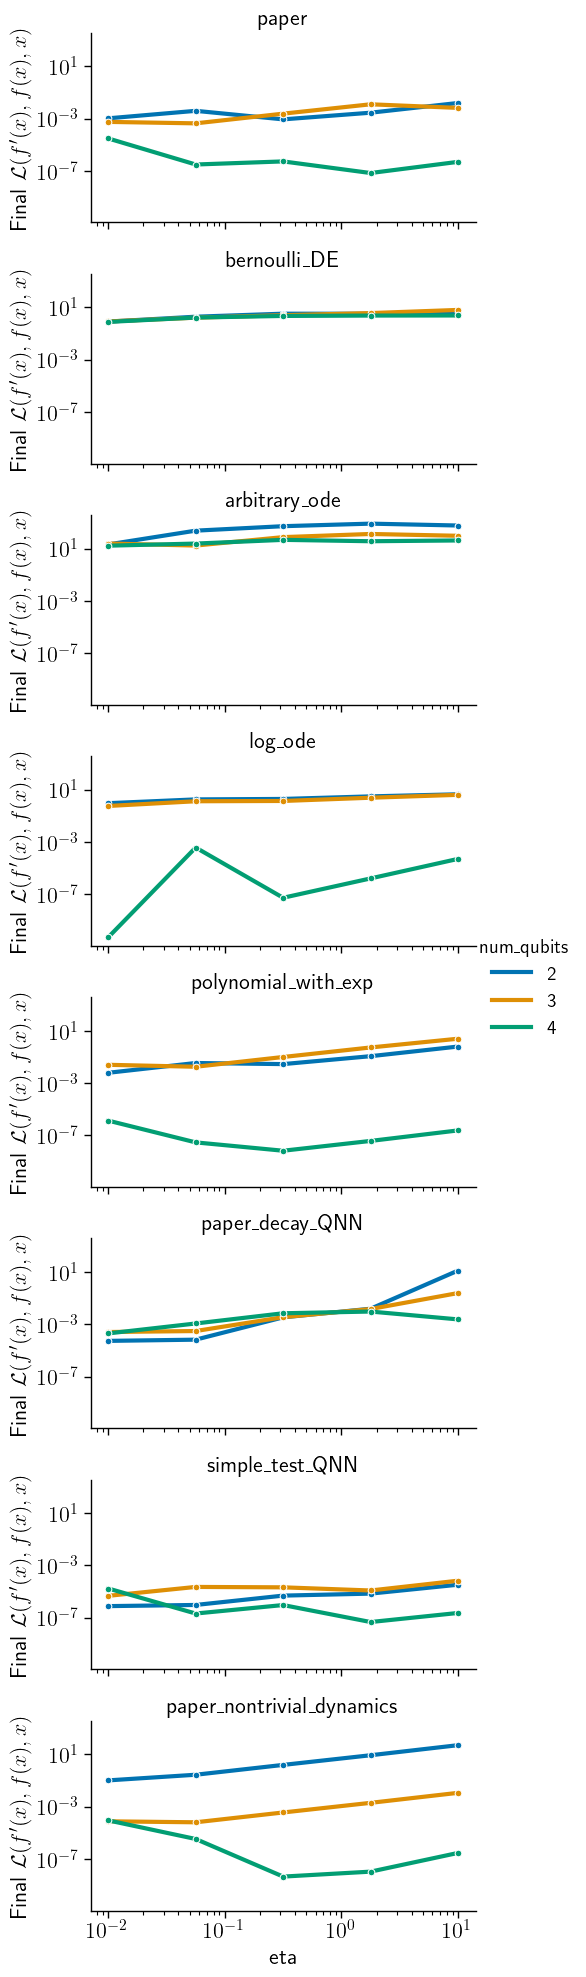

In [11]:
#make a relplot, showing the smallest value of the loss function for each method and loss function as a funtion of the number of qubits
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3})

g = sns.relplot(x="eta", y="Final " + loss_history_str ,
                data=results_QK,
                kind="line", 
                row="loss_name", 
                hue="num_qubits",
                height=2.5,  # Adjust the height as needed
                aspect=2,  
                marker="o",
                palette=palette
                )

#g log scale
#g title
g.set_titles("{row_name}")
g.set(yscale="log", xscale="log")

leg = g._legend

#export with 400 dpi
#plt.savefig("./DE_0_30_comparison.png", dpi=400)

C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_11060\1287110921.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  g = sns.relplot(x="eta", y="Final " + mse_history_str,
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future

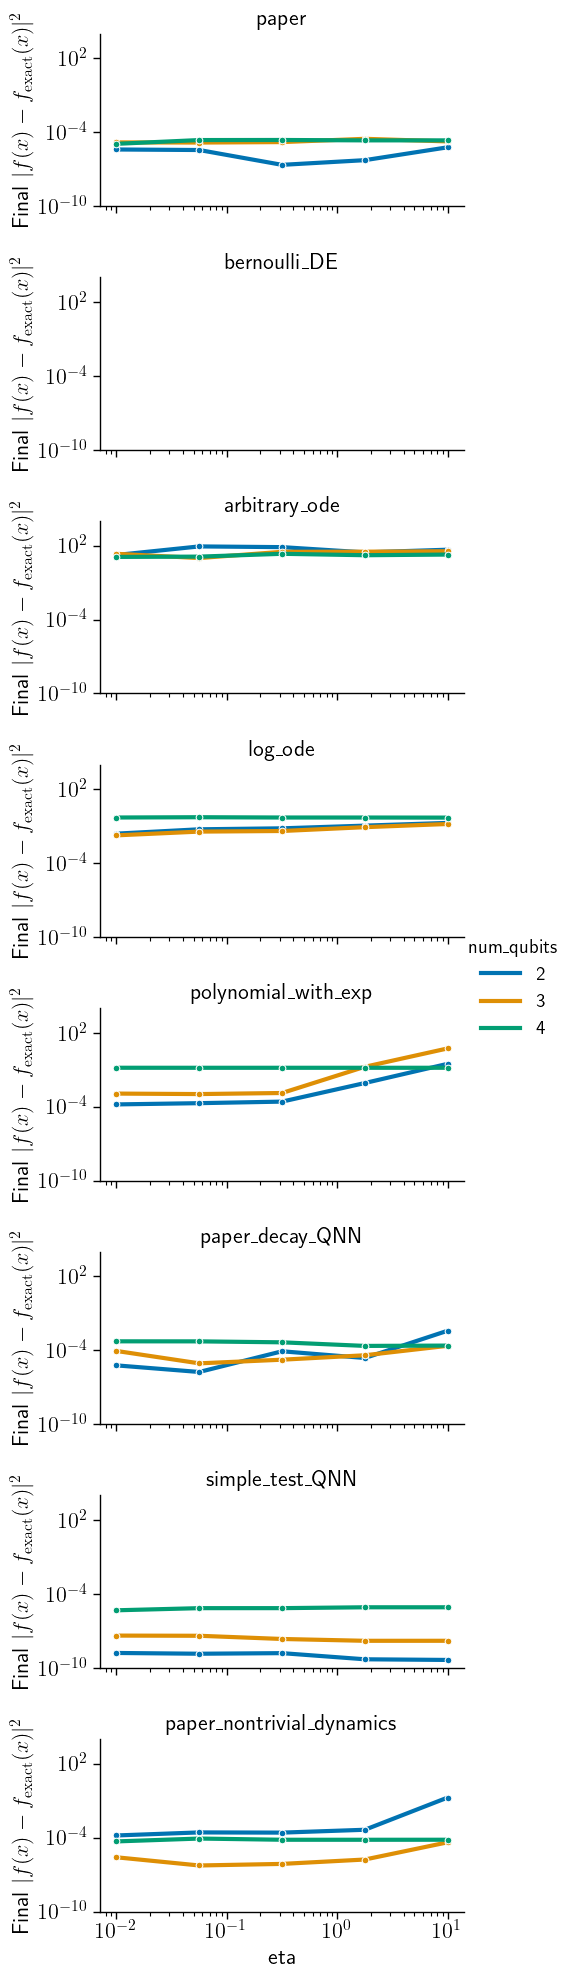

In [21]:
#make a relplot, showing the smallest value of the loss function for each method and loss function as a funtion of the number of qubits
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3})

g = sns.relplot(x="eta", y="Final " + mse_history_str,
                data=results_QK,
                kind="line", 
                row="loss_name", 
                hue="num_qubits",
                height=2.5,  # Adjust the height as needed
                aspect=2,  
                marker="o",
                palette=palette,
                facet_kws=dict(sharey="row")
                )

#g log scale
#g title
g.set_titles("{row_name}")
g.set(yscale="log", xscale="log")

g.set(ylim=(1e-10, 1e4))
leg = g._legend

#export with 400 dpi
#plt.savefig("./DE_0_30_comparison.png", dpi=400)

In [22]:
mse_df = results_QK.copy()
#mse_df drop column loss_history str
mse_df = mse_df.drop(columns=["Final " + loss_history_str])
mse_df["Loss"] = mse_df["Final " + mse_history_str]
mse_df["Type of Loss"] = mse_history_str

true_loss_df = results_QK.copy()
#true_loss_df drop column mse_history_str
true_loss_df = true_loss_df.drop(columns=["Final " +mse_history_str])
true_loss_df["Loss"] = true_loss_df["Final " + loss_history_str]
true_loss_df["Type of Loss"] = loss_history_str

combined_df = pd.concat([mse_df, true_loss_df])
#rename min_loss to Loss

#sort combined_df by mse_loss smallest to largest
combined_df = combined_df.sort_values(by="Final " + mse_history_str) #or loss_history_str
#drop 
combined_df_top = combined_df.drop_duplicates(subset=["num_qubits", "loss_name", "Type of Loss"])
combined_df_top = combined_df_top.drop(columns=["Final " + mse_history_str, "Final " + loss_history_str])

C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_11060\3603945038.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(x="num_qubits", y="Loss" ,
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(na

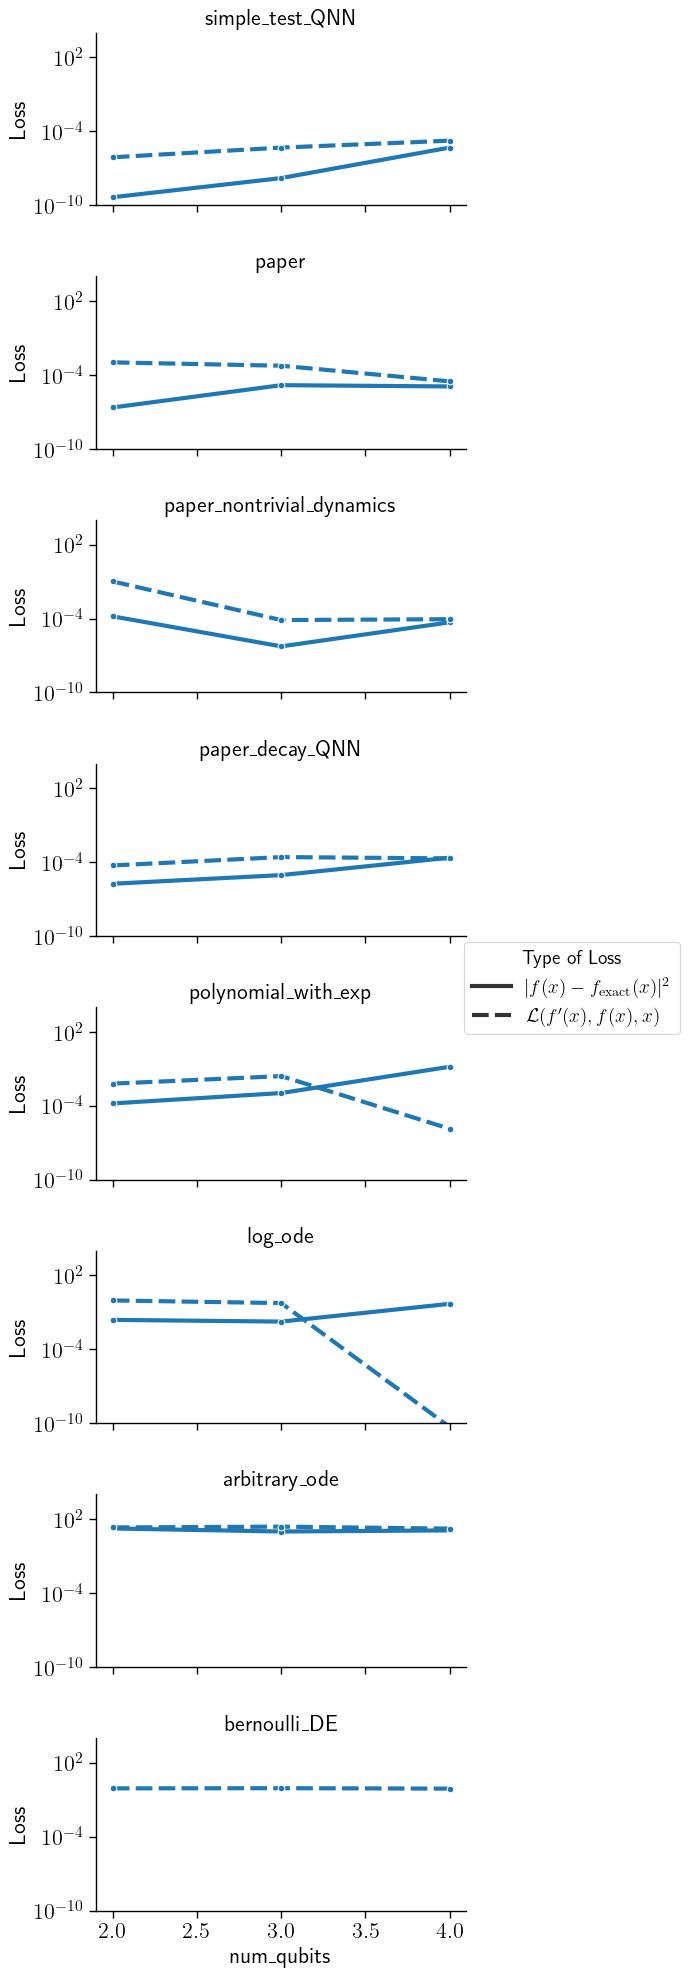

In [23]:
#make a relplot, showing the smallest value of the loss function for each method and loss function as a funtion of the number of qubits

##plt.legend(fontsize=14, edgecolor="black", fancybox=True, frameon=True, framealpha=0.9, labelspacing=0.25)
#use this settings in sns
#include fancy box in set context
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3})



g = sns.relplot(x="num_qubits", y="Loss" ,
                data=combined_df_top,
                kind="line", 
                row="loss_name", 
                style="Type of Loss",
                height=2.5,  # Adjust the height as needed
                aspect=2,  
                marker="o",
                palette=palette
                )

#g log scale
#g title
g.set_titles("{row_name}")
g.set(yscale="log")
#g.set_xlabels("Number of qubits", fontsize=16)
#g.set_ylabels("Loss", fontsize=16)
#g.add_legend(fontsize=14, edgecolor="black", fancybox=True, frameon=True, framealpha=0.9, labelspacing=0.25)
#g tick_params
#change g legend fontsize

g.set(ylim=(1e-10, 1e4))

leg = g._legend

leg.set_frame_on(True)
#leg set fancybox


#g.tick_params(labelsize=14)



In [24]:
from scipy.integrate import solve_ivp


function_list = [("paper", [1], np.linspace(0, 0.9, 100)), 
                 ("log_ode", [np.log(0.01)], np.linspace(0.01, 0.9, 100)),
                 ("polynomial_with_exp", [3], np.linspace(0, 0.9, 100)),
                 ("paper_decay_QNN", [1], np.linspace(0, 0.9, 100)),
                ("simple_test_QNN", [1], np.linspace(0, 0.9, 100)),
                ("paper_nontrivial_dynamics", [0.75], np.linspace(0, 0.9, 100)),
                ("bernoulli_DE", [0], np.linspace(0, 0.9, 100)),
                ("arbitrary_ode", [0], np.linspace(0, 0.9, 100)),
                 ]




sol_y_dict = {}

for function_name, y0, x_eval in function_list:
    sol = solve_ivp(loss_to_ivp_loss(mapping_of_derivatives_of_loss_functions[function_name]), (x_eval[0], x_eval[-1]), y0, t_eval=x_eval, method='RK45')
    sol_y_dict[function_name] = sol.y


bug bernoulli_DE


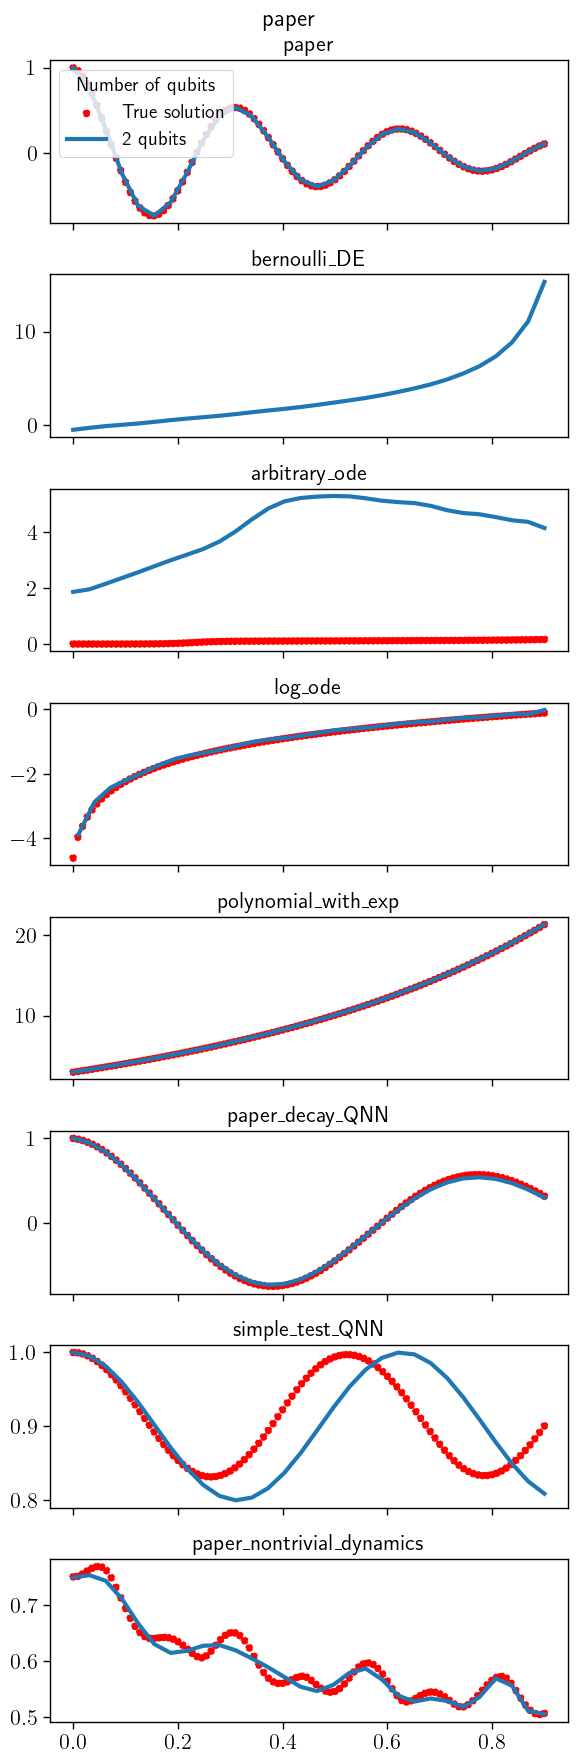

In [26]:
#make a relplot, showing the smallest value of the loss function for each method and loss function as a funtion of the number of qubits

##plt.legend(fontsize=14, edgecolor="black", fancybox=True, frameon=True, framealpha=0.9, labelspacing=0.25)
#use this settings in sns
#include fancy box in set context
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3})




results_filtered = results[["domain", "f_sol", "num_qubits", "loss_name", "method", "mse"]]

index_pairs = [(0, 0), (0, 1), (1, 0), (1, 1)]
j = 0


f_initial = 1
true_sol = odeint(mapping_of_derivatives_of_loss_functions["paper"], f_initial, results_filtered["domain"].iloc[0])
true_sol_continous = odeint(mapping_of_derivatives_of_loss_functions["paper"], f_initial, np.linspace(0, 1, 100))

fig, axs = plt.subplots(8, 1, figsize=(6, 18), sharex=True)


#suptitle
fig.suptitle(results_filtered["loss_name"].unique()[j])
for j in range(len(results_filtered["loss_name"].unique())):
    for i in range(len(results_filtered["method"].unique())):
        ax = axs[j]
        results_filtered_filtered = results_filtered[(results_filtered["method"] == results_filtered["method"].unique()[i]) & (results_filtered["loss_name"] == results_filtered["loss_name"].unique()[j])]

        try:
            x_domain = np.linspace(0, 0.9, 100)
            true_sol = sol_y_dict[results_filtered["loss_name"].unique()[j]]
            ax.scatter(x_domain, true_sol, label="True solution", linestyle="--", color="red")

        except:
            print("bug", results_filtered["loss_name"].unique()[j])
            pass

        #sort by number of qubits
        results_filtered_filtered = results_filtered_filtered.sort_values("num_qubits")
        for qubits in [2]:#results_filtered_filtered["num_qubits"].unique():
            results_qb= results_filtered_filtered[results_filtered_filtered["num_qubits"] == qubits]
            results_qb= results_qb.sort_values("mse")
            ax.plot(results_qb["domain"].iloc[0], results_qb["f_sol"].iloc[0], label=str(qubits) + " qubits")
        ax.set_title(results_filtered["loss_name"].unique()[j] )
        
        if j == 0:
            ax.legend(title="Number of qubits")

    plt.tight_layout()

